<a href="https://colab.research.google.com/github/hungryjins/DA_portfolio/blob/main/Chapter25.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ** Chapter 25 **
** ┗ Heart disease prediction **
---
> ** Contents (context) **

* Looking at the problem situation and data
* Definition of problem solving process
* 🥉Session 1 -「Heart Disease Summary」
* 🥈SESSION 2 -「Search of Heart disease impact factors」
* 🥇Session 3 -「ML Use Heart Disease prediction」


In [ ]:
# ▶ Remove Warnings
import warnings
warnings.filterwarnings('ignore')

# ▶ Google Drive Mount
from google.colab import drive
drive.mount('/content/drive')

import os
os.chdir('/content/drive/MyDrive/DA portfolio/DA_colab/25_Heart Disease Prediction')
os.getcwd()

Mounted at /content/drive


'/content/drive/MyDrive/DA portfolio/DA_colab/25_Heart Disease Prediction'

## ** Looking at the problem situation and data **
---
> ** Scenario ** 🧑 (Medical workers)

``
Hospital A is planning a health management operation program from a customer CARE perspective to increase sales.Especially in heart disease that can be directly related to life
We will operate for customers with high risks.Using personal profile information and health data of patients,
Based on this, the company plans to operate a health care operating program with customer selection.
``


> ** Looking at the data **

* Patient personal profile data
* Data specification ⬇

| HeartDiseaseOrattack | Highchol | Cholcheck | BMI | Smoker |
|: ---: |: ---: | ---: | ---: ---: | ---: | ---: |
| Heart Disease Fertility | High blood pressure | Blood Colltrol | Whether or not a cholestrol test within the last 5 years | Body mass index | Smoking Actor |
| Stroke | DIABETES | Physactivity | Fruits | Veggies | HVYALCOHOLCONSUMP |
| Stroke Middle School | Diabetes Bottle | Athletic Ward within 30 days | Standard intake of fruit once a day | Whether to drink vegetables once a day | Over drinking |
| MENTHLTH | Physhlth | Diffwalk | Anyhealthcare |
| Last 30th Stress Day | Last 30 days of body health bad day | Stairs/steps | Health Insurance Health | Visit within 12 months.
| Sex | Age | Education | INCOME |
| Gender | age | Education level | Income level |


In [ ]:
# ▶ Data read
import pandas as pd
df = pd.read_csv('chapter25_heart_disease.csv')
df.head(5)

,HeartDiseaseorAttack,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,Diabetes,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0
3,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0
4,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0



## ** Problem solving process definition **
---
> ** ** of the problem

``
▶ Necessary new service planning and operation due to decrease in sales
``

> ** Expected effect **

``
▶ Customer selection (sales increase) and customer satisfaction increase to operate heart disease management programs
``

> ** Solution **

``
▶ Forecasting and selecting customers with high possibility of heart disease and operating a management program
▶ Session 1 🥉
-Data pretreatment and diseases data search
▶ Session 2 🥈
-Data extraction and detailed analysis of correlation through HEAT MAP analysis
▶ Session 3 🥇
-Explicating patients with heart disease using ML algorithms
``

> ** Performance measurement **

``
▶ Monitoring customer survey satisfaction and sales increase effect
``

> ** Public application **

``
▶ Create data Mart for input to Model
▶ Exclusion and selection of customer groups using predictive models
▶ Performing a health care operation program for selected customers
``

> ** Main code preview **

``
▶ Session 1 → Catplot, Groupby.agg (), DF.STYLE.BACKGROUND_GRADIENT (cmap = '' '' ''
▶ Session 2 → SNS.Heatmap (), DF.Corr ()
▶ Session 3 → RandomForestClassifier (), Labelencoder (), ROC_AUC_SCORE, ROC_CURVE
``


## ** 🥉Session 1 **
** ┗ Heart disease Summary **
---


### · Data pretreatment
---
* Check the basic information of the collected data

(1) Data Shape Check

(2) Check Data Type

(3) NULL value check (※ Data of empty values)

(4) Outlier verification (※ Data beyond normal category)


In [ ]:
# ▶ Data type confirmation
# ▶ 253,680 row, 22 cola
print('df', df.shape)

df (253680, 22)


In [ ]:
# ▶ Data Type Check
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253680 entries, 0 to 253679
Data columns (total 22 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   HeartDiseaseorAttack  253680 non-null  float64
 1   HighBP                253680 non-null  float64
 2   HighChol              253680 non-null  float64
 3   CholCheck             253680 non-null  float64
 4   BMI                   253680 non-null  float64
 5   Smoker                253680 non-null  float64
 6   Stroke                253680 non-null  float64
 7   Diabetes              253680 non-null  float64
 8   PhysActivity          253680 non-null  float64
 9   Fruits                253680 non-null  float64
 10  Veggies               253680 non-null  float64
 11  HvyAlcoholConsump     253680 non-null  float64
 12  AnyHealthcare         253680 non-null  float64
 13  NoDocbcCost           253680 non-null  float64
 14  GenHlth               253680 non-null  float64
 15  

In [ ]:
# ▶ Check NULL value
print(df.isnull().sum())

HeartDiseaseorAttack    0
HighBP                  0
HighChol                0
CholCheck               0
BMI                     0
Smoker                  0
Stroke                  0
Diabetes                0
PhysActivity            0
Fruits                  0
Veggies                 0
HvyAlcoholConsump       0
AnyHealthcare           0
NoDocbcCost             0
GenHlth                 0
MentHlth                0
PhysHlth                0
DiffWalk                0
Sex                     0
Age                     0
Education               0
Income                  0
dtype: int64


In [ ]:
# ▶ Outlier verification
df.describe()

,HeartDiseaseorAttack,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,Diabetes,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
count,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,...,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000
mean,0.094186,0.429001,0.424121,0.962670,28.382364,0.443169,0.040571,0.296921,0.756544,0.634256,...,0.951053,0.084177,2.511392,3.184772,4.242081,0.168224,0.440342,8.032119,5.050434,6.053875
std,0.292087,0.494934,0.494210,0.189571,6.608694,0.496761,0.197294,0.698160,0.429169,0.481639,...,0.215759,0.277654,1.068477,7.412847,8.717951,0.374066,0.496429,3.054220,0.985774,2.071148
min,0.000000,0.000000,0.000000,0.000000,12.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,1.000000,24.000000,0.000000,0.000000,0.000000,1.000000,0.000000,...,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,6.000000,4.000000,5.000000
50%,0.000000,0.000000,0.000000,1.000000,27.000000,0.000000,0.000000,0.000000,1.000000,1.000000,...,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,8.000000,5.000000,7.000000
75%,0.000000,1.000000,1.000000,1.000000,31.000000,1.000000,0.000000,0.000000,1.000000,1.000000,...,1.000000,0.000000,3.000000,2.000000,3.000000,0.000000,1.000000,10.000000,6.000000,8.000000
max,1.000000,1.000000,1.000000,1.000000,98.000000,1.000000,1.000000,2.000000,1.000000,1.000000,...,1.000000,1.000000,5.000000,30.000000,30.000000,1.000000,1.000000,13.000000,6.000000,8.000000


### · Data search
---


In [ ]:
df.head(5)

,HeartDiseaseorAttack,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,Diabetes,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0
3,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0
4,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0


In [ ]:
df['HeartDiseaseorAttack'].value_counts()

,count
HeartDiseaseorAttack,
0.0,229787
1.0,23893


In [ ]:
# ▶ About 10% incidence of heart disease
23893 / (23893 + 229787)

0.09418558814254178

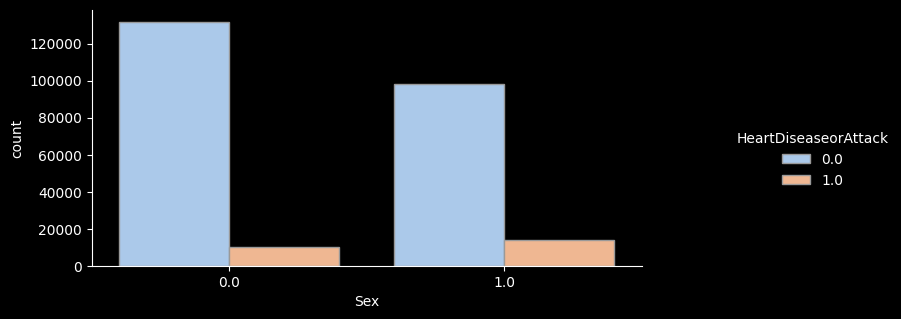

In [ ]:
# ▶ Comparison of incidence of heart disease according to gender

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
plt.style.use(['dark_background'])

sns.catplot(x="Sex", kind="count", hue="HeartDiseaseorAttack",palette="pastel", edgecolor=".6",data=df);
plt.gcf().set_size_inches(10, 3)

In [ ]:
# ▶ Comparison of incidence of heart disease according to gender
df_gp = df.groupby('Sex')['HeartDiseaseorAttack'].agg(['count','sum'])
df_gp['ratio'] = round((df_gp['sum'] / df_gp['count']) * 100, 1)
df_gp = df_gp.sort_values(by=['ratio'], ascending=False)
df_gp

,count,sum,ratio
Sex,,,
1.0,111706,13688.0,12.3
0.0,141974,10205.0,7.2


In [ ]:
# ▶ Visual expression Tip
pd.DataFrame(df_gp['ratio']).style.background_gradient(cmap='Reds')

,ratio
Sex,
1.000000,12.300000
0.000000,7.200000


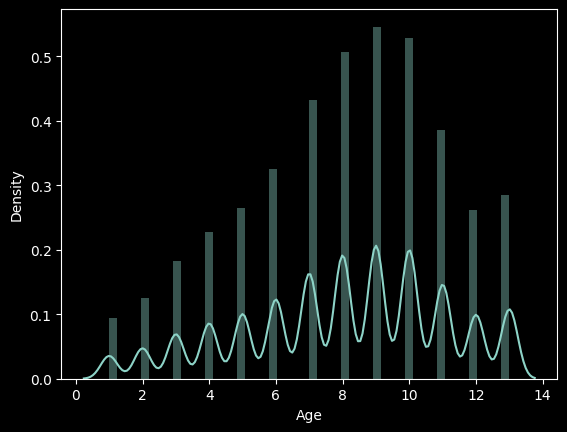

In [ ]:
# ▶ Comparison of incidence of heart disease according to age
sns.distplot(df['Age']);

In [ ]:
# ▶ Comparison of incidence of heart disease according to age
import numpy as np
df['Age_gp'] = np.where (df['Age'] <= 4, '4세이하',
                           np.where(df['Age'] <= 10, '4-10세 이하', '10세 초과'))

df[['Age','Age_gp']]

,Age,Age_gp
0,9.0,4-10세 이하
1,7.0,4-10세 이하
2,9.0,4-10세 이하
3,11.0,10세 초과
4,11.0,10세 초과
...,...,...
253675,5.0,4-10세 이하
253676,11.0,10세 초과
253677,2.0,4세이하
253678,7.0,4-10세 이하


In [ ]:
# ▶ Comparison of incidence of heart disease according to age
df_gp = df.groupby('Age_gp')['HeartDiseaseorAttack'].agg(['count','sum'])
df_gp['ratio'] = round((df_gp['sum'] / df_gp['count']) * 100, 1)
df_gp

,count,sum,ratio
Age_gp,,,
10세 초과,56876,11199.0,19.7
4-10세 이하,158560,12292.0,7.8
4세이하,38244,402.0,1.1


In [ ]:
# ▶ Visual expression Tip
df_gp_ratio = df_gp[['ratio']]
df_gp_ratio.style.background_gradient(cmap='Reds')

,ratio
Age_gp,
10세 초과,19.700000
4-10세 이하,7.800000
4세이하,1.100000


## ** 🥈Session 2 **
** ┗ Heart disease impact factor search **
---


### · Heatmap analysis
---


In [ ]:
df.head(5)

,HeartDiseaseorAttack,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,Diabetes,PhysActivity,Fruits,...,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income,Age_gp
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,...,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0,4-10세 이하
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,...,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0,4-10세 이하
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,...,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0,4-10세 이하
3,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,...,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0,10세 초과
4,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,...,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0,10세 초과


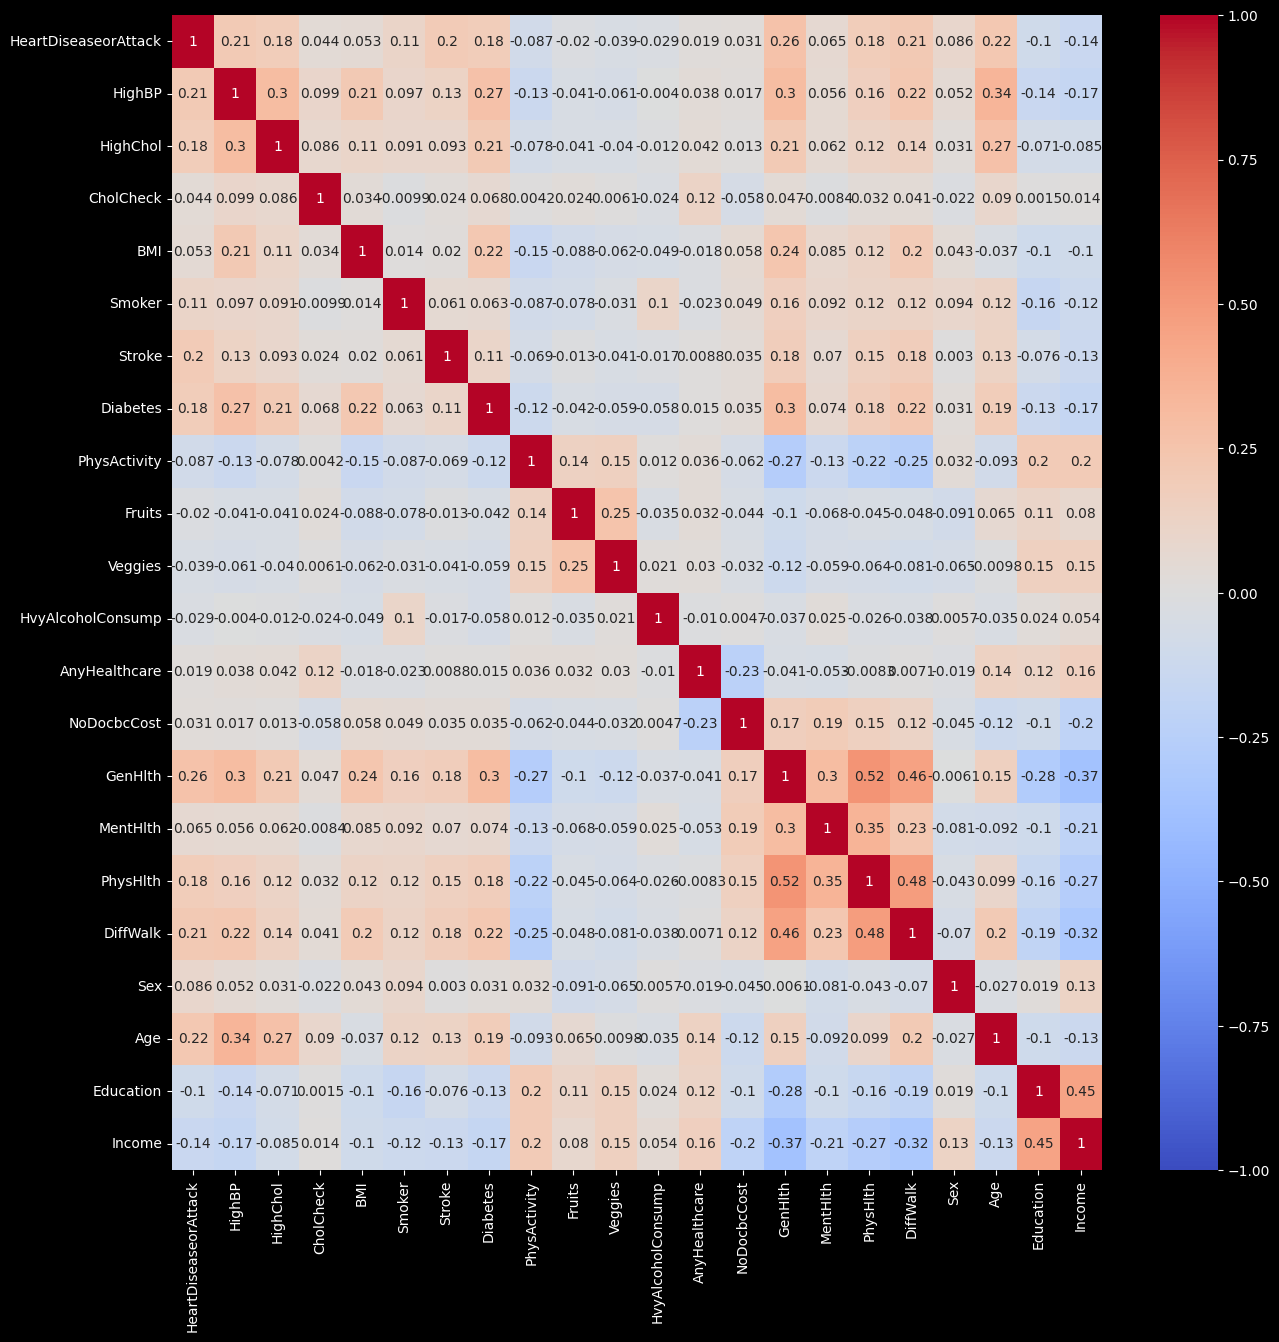

In [ ]:
# ▶ Since all variables are numeric variables, overall Summary through CORR HEATMAP
# Exclude the 'Age_gp' column, which contains string values
sns.heatmap(df.drop(columns=['Age_gp']).corr(), vmin=-1, vmax=+1, annot=True, cmap='coolwarm');
plt.gcf().set_size_inches(15, 15)

In [ ]:
# ▶ Bring only CORR and start searching, only the correlation coefficient with heart disease, only the first cola is imported.
df_corr = pd.DataFrame(df.corr().iloc[:,0])
df_corr = df_corr.iloc[1:,:]
df_corr.columns = ['corr']
df_corr

ValueError: could not convert string to float: '4-10세 이하'

In [ ]:
# ▶ Bring only cor and start search (※ Correlation coefficient 0.2 or more)
df_corr [ abs(df_corr['corr']) > 0.2 ]

NameError: name 'df_corr' is not defined

### · Explore important variables
---


         count      sum  ratio
HighBP                        
0.0     144851   5965.0    4.1
1.0     108829  17928.0   16.5


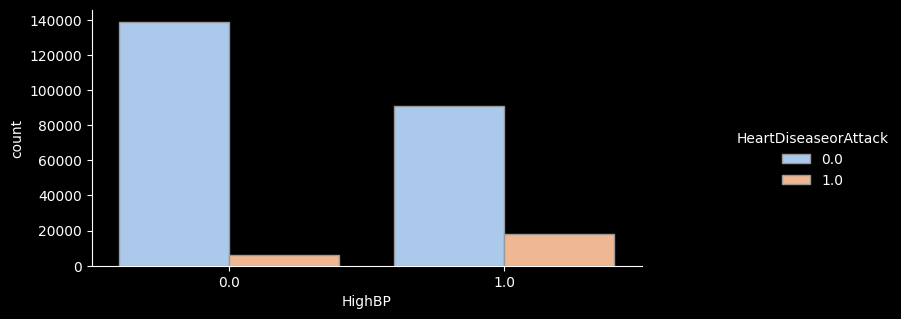

In [ ]:
# ▶ Highbp (high blood pressure)
sns.catplot(x="HighBP", hue="HeartDiseaseorAttack", kind="count",palette="pastel", edgecolor=".6",data=df);
plt.gcf().set_size_inches(10, 3)


df_gp = df.groupby('HighBP')['HeartDiseaseorAttack'].agg(['count','sum'])
df_gp['ratio'] = round((df_gp['sum'] / df_gp['count']) * 100, 1)
print(df_gp)

         count      sum  ratio
Stroke                        
0.0     243388  19956.0    8.2
1.0      10292   3937.0   38.3


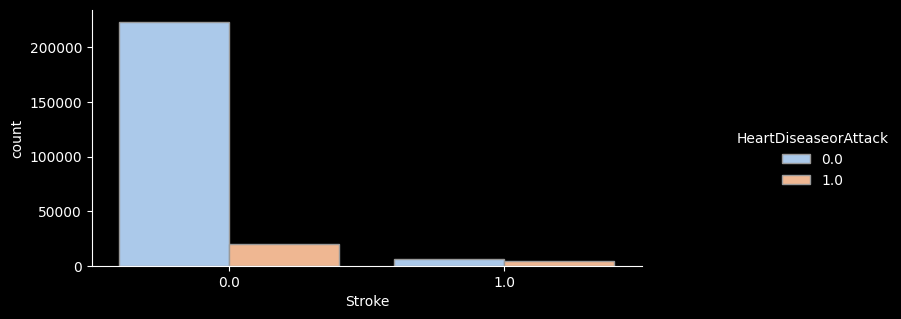

In [ ]:
# ▶ Stroke (stroke)
sns.catplot(x="Stroke", hue="HeartDiseaseorAttack", kind="count",palette="pastel", edgecolor=".6",data=df);
plt.gcf().set_size_inches(10, 3)


df_gp = df.groupby('Stroke')['HeartDiseaseorAttack'].agg(['count','sum'])
df_gp['ratio'] = round((df_gp['sum'] / df_gp['count']) * 100, 1)
print(df_gp)

         count     sum  ratio
GenHlth                      
1.0      45299  1016.0    2.2
2.0      89084  4128.0    4.6
3.0      75646  7914.0   10.5
4.0      31570  6728.0   21.3
5.0      12081  4107.0   34.0


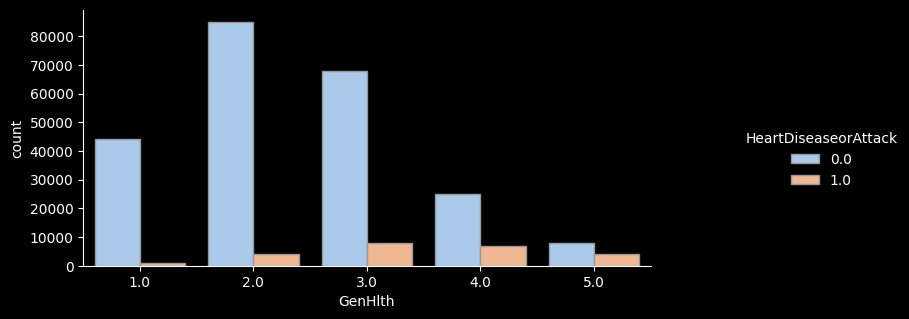

In [ ]:
# ▶ Genhlth (common health status)
sns.catplot(x="GenHlth", hue="HeartDiseaseorAttack", kind="count",palette="pastel", edgecolor=".6",data=df);
plt.gcf().set_size_inches(10, 3)


df_gp = df.groupby('GenHlth')['HeartDiseaseorAttack'].agg(['count','sum'])
df_gp['ratio'] = round((df_gp['sum'] / df_gp['count']) * 100, 1)
print(df_gp)

           count      sum  ratio
DiffWalk                        
0.0       211005  13978.0    6.6
1.0        42675   9915.0   23.2


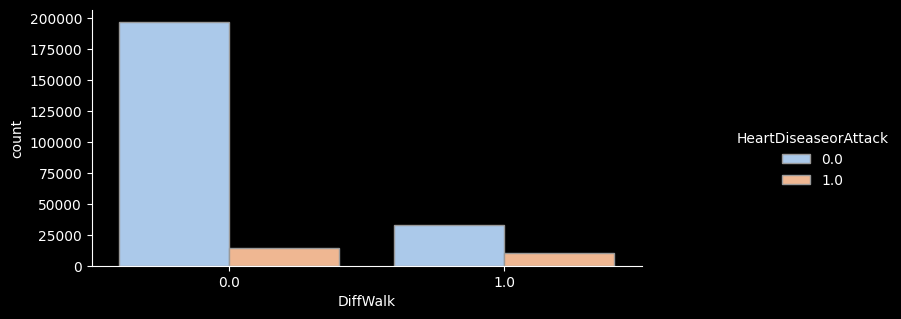

In [ ]:
# ▶ Diffwalk
val = 'DiffWalk'

sns.catplot(x=val, hue="HeartDiseaseorAttack", kind="count",palette="pastel", edgecolor=".6",data=df);
plt.gcf().set_size_inches(10, 3)


df_gp = df.groupby(val)['HeartDiseaseorAttack'].agg(['count','sum'])
df_gp['ratio'] = round((df_gp['sum'] / df_gp['count']) * 100, 1)
print(df_gp)

      count     sum  ratio
Age                       
1.0    5700    29.0    0.5
2.0    7598    54.0    0.7
3.0   11123   126.0    1.1
4.0   13823   193.0    1.4
5.0   16157   351.0    2.2
6.0   19819   712.0    3.6
7.0   26314  1425.0    5.4
8.0   30832  2253.0    7.3
9.0   33244  3358.0   10.1
10.0  32194  4193.0   13.0
11.0  23533  3947.0   16.8
12.0  15980  3093.0   19.4
13.0  17363  4159.0   24.0


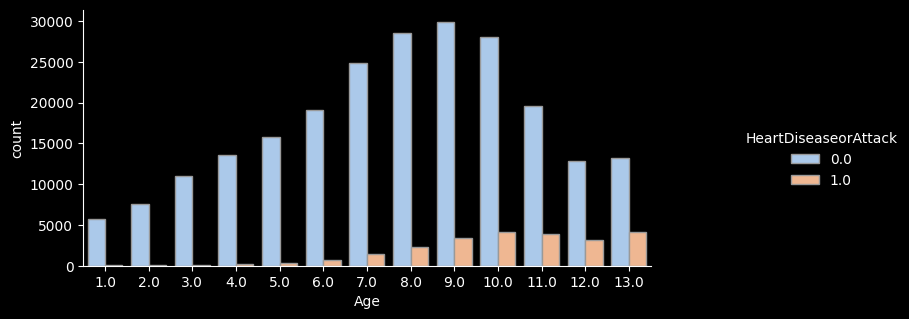

In [ ]:
# ▶ AGE (age)
sns.catplot(x="Age", hue="HeartDiseaseorAttack", kind="count",palette="pastel", edgecolor=".6",data=df);
plt.gcf().set_size_inches(10, 3)


df_gp = df.groupby('Age')['HeartDiseaseorAttack'].agg(['count','sum'])
df_gp['ratio'] = round((df_gp['sum'] / df_gp['count']) * 100, 1)
print(df_gp)

## ** 🥇Session 3 **
** ┗ ML Use Heart Disease prediction **
---


### · Preparation of data for modeling
---
* Sharing data to FEATURE and Y, which is the value you want to predict to perform modeling
* Train / test set division for learning and prediction


In [ ]:
df.head(5)

,HeartDiseaseorAttack,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,Diabetes,PhysActivity,Fruits,...,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income,Age_gp
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,...,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0,4-10세 이하
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,...,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0,4-10세 이하
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,...,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0,4-10세 이하
3,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,...,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0,10세 초과
4,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,...,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0,10세 초과


In [ ]:
# ▶ Steps to distinguish between Fearue (x) and Y data for learning modeling
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics

X=df.drop(['HeartDiseaseorAttack', 'Age_gp'], axis=1)
Y=df['HeartDiseaseorAttack']

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, stratify=Y)

print(x_train.shape)
print(y_train.shape)

print(x_test.shape)
print(y_test.shape)

(177576, 21)
(177576,)
(76104, 21)
(76104,)


In [ ]:
# ▶ Stratify = 'Y' option results confirm
pd.Series(y_train).value_counts()

,count
HeartDiseaseorAttack,
0.0,160851
1.0,16725


In [ ]:
16725/(160851+16725)

0.09418502500337883

In [ ]:
# ▶ Stratify = 'Y' option results confirm
pd.Series(y_test).value_counts()

,count
HeartDiseaseorAttack,
0.0,68936
1.0,7168


In [ ]:
7168/(68936+7168)

0.094186902133922

### · Model learning and evaluation
---
* Evaluate performance by learning the model and performing predictions


In [ ]:
from sklearn.metrics import classification_report
# ▶ Learning
rfc = RandomForestClassifier(random_state = 123456, max_depth=6)
rfc.fit(x_train, y_train)

# ▶ Prediction
y_pred_train = rfc.predict(x_train)
y_pred_test = rfc.predict(x_test)

print(classification_report(y_train, y_pred_train))
print(classification_report(y_test, y_pred_test))

              precision    recall  f1-score   support

         0.0       0.91      1.00      0.95    160851
         1.0       0.76      0.02      0.04     16725

    accuracy                           0.91    177576
   macro avg       0.83      0.51      0.49    177576
weighted avg       0.89      0.91      0.86    177576

              precision    recall  f1-score   support

         0.0       0.91      1.00      0.95     68936
         1.0       0.73      0.02      0.03      7168

    accuracy                           0.91     76104
   macro avg       0.82      0.51      0.49     76104
weighted avg       0.89      0.91      0.86     76104



In [ ]:
pd.Series(y_pred_train).value_counts()

,count
0.0,177173
1.0,403


In [ ]:
# ▶ Q. [Test] Precision = 0.60, threshold = ? ↓(base:0.5), Recall = ?
pd.Series(y_pred_test).value_counts()

,count
0.0,75940
1.0,164


In [ ]:
from sklearn.preprocessing import Binarizer

# ▶ If the threshold increases, the precision value increases because it will predict the real correct answer data (※ Number of predicted numbers)
# ▶ If the threshold decreases, the recall value increases because it predicts more of the correct answer that is a little more likely (※ Increased number of predicted numbers)
Input_threshold = 0.405

pred_proba_test = rfc.predict_proba(x_test)[:,1].reshape(-1,1)
custom_predict = Binarizer(threshold=Input_threshold).fit_transform(pred_proba_test)

# ▶ Confirmation of performance evaluation
print(classification_report(y_test, custom_predict))

              precision    recall  f1-score   support

         0.0       0.91      1.00      0.95     68936
         1.0       0.62      0.07      0.13      7168

    accuracy                           0.91     76104
   macro avg       0.77      0.53      0.54     76104
weighted avg       0.88      0.91      0.87     76104



In [ ]:
pd.Series(custom_predict.reshape(-1)).value_counts()

,count
0.0,75295
1.0,809


In [ ]:
# ▶ Suitable issues, the maximum performance of train and test sets prevents overpacking.
from sklearn.metrics import roc_auc_score

y_pred_train_proba = rfc.predict_proba(x_train)[:, 1]
y_pred_test_proba = rfc.predict_proba(x_test)[:, 1]


roc_score_train = roc_auc_score(y_train, y_pred_train_proba)
roc_score_test = roc_auc_score(y_test, y_pred_test_proba)

print("roc_score_train :", roc_score_train)
print("roc_score_test :", roc_score_test)

roc_score_train : 0.8408876404096564
roc_score_test : 0.8434460232880341


In [ ]:
from sklearn.metrics import roc_curve
def roc_curve_plot(y_test , pred_proba_c1):
    # Returns FPR and TPR values ​​according to lymph values.
    fprs , tprs , thresholds = roc_curve(y_test ,pred_proba_c1)

    # ROC curve is painted with a Plot curve.
    plt.plot(fprs , tprs, label='ROC')
    # Picture diagonal straight lines in the middle.
    plt.plot([0, 1], [0, 1], 'k--', label='Random', color='red')

    # Change the scale of the FPR X axis to 0.1 units, X, Y -name settings, etc.
    start, end = plt.xlim()
    plt.xticks(np.round(np.arange(start, end, 0.1),2))
    plt.xlim(0,1)
    plt.ylim(0,1)
    plt.xlabel('FPR( 1 - Sensitivity )')
    plt.ylabel('TPR( Recall )')
    plt.legend()
    plt.show()

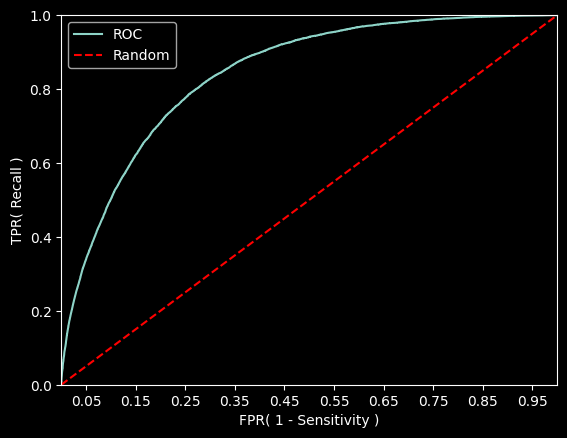

In [ ]:
roc_curve_plot(y_train, y_pred_train_proba)

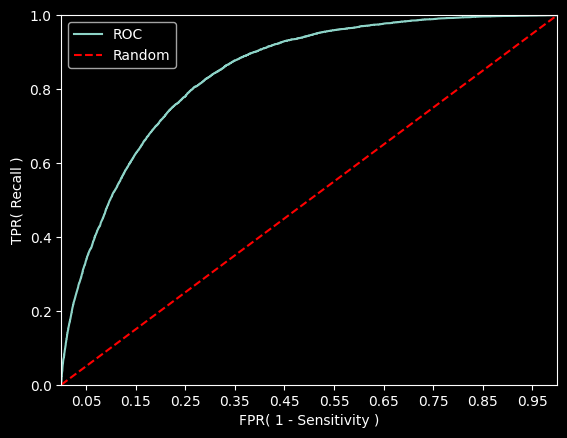

In [ ]:
roc_curve_plot(y_test, y_pred_test_proba)

### · Identify important variables
---
* Finding important variables through feature IMP analysis


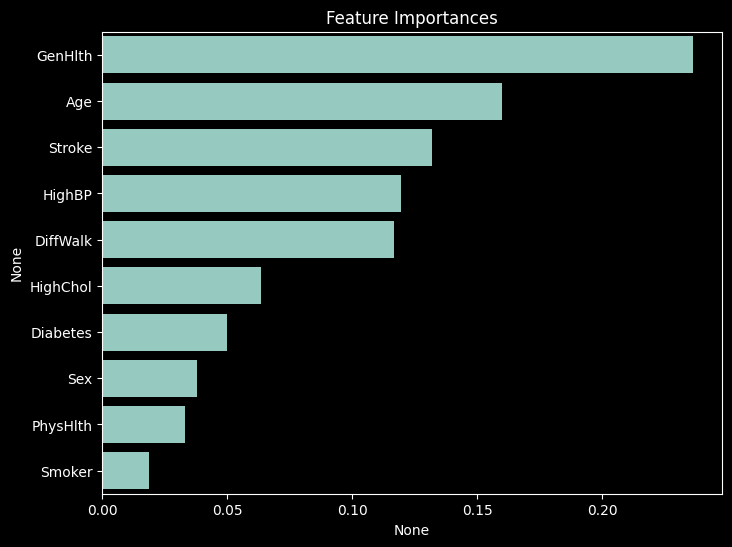

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
plt.style.use(['dark_background'])

ftr_importances_values = rfc.feature_importances_ # light GBM : feature_importances()
ftr_importances = pd.Series(ftr_importances_values, index = x_train.columns)
ftr_top20 = ftr_importances.sort_values(ascending=False)[:10]

plt.figure(figsize=(8,6))
plt.title('Feature Importances')
sns.barplot(x=ftr_top20, y=ftr_top20.index)
# plt.rc('xtick', labelsize=5)
plt.show()

         count     sum  ratio
GenHlth                      
1.0      45299  1016.0    2.2
2.0      89084  4128.0    4.6
3.0      75646  7914.0   10.5
4.0      31570  6728.0   21.3
5.0      12081  4107.0   34.0


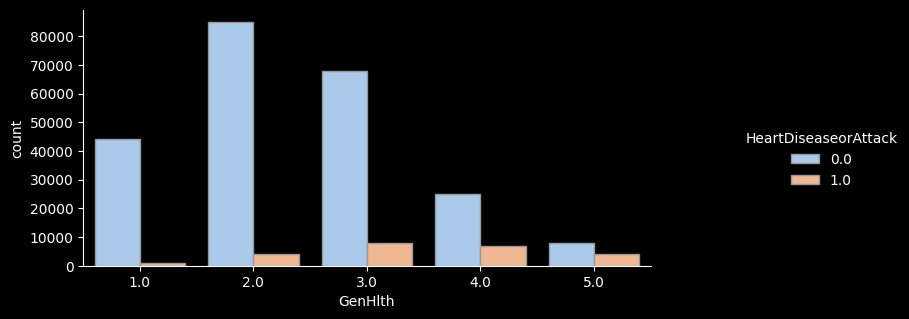

In [ ]:
# ▶ Candidate No. 1 variable search
# ▶ Genhlth (common health status)
sns.catplot(x="GenHlth", hue="HeartDiseaseorAttack", kind="count",palette="pastel", edgecolor=".6",data=df);
plt.gcf().set_size_inches(10, 3)


df_gp = df.groupby('GenHlth')['HeartDiseaseorAttack'].agg(['count','sum'])
df_gp['ratio'] = round((df_gp['sum'] / df_gp['count']) * 100, 1)
print(df_gp)

           count      sum  ratio
HighChol                        
0.0       146089   7140.0    4.9
1.0       107591  16753.0   15.6


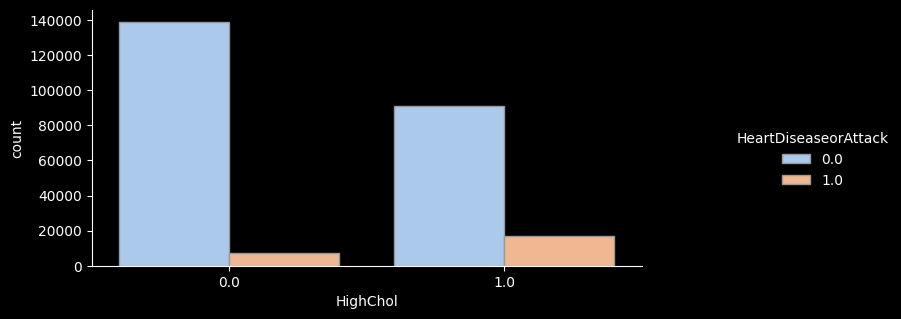

In [ ]:
# ▶ HIGH CHOL (whether or not cholesterol)
sns.catplot(x="HighChol", hue="HeartDiseaseorAttack", kind="count",palette="pastel", edgecolor=".6",data=df);
plt.gcf().set_size_inches(10, 3)


df_gp = df.groupby('HighChol')['HeartDiseaseorAttack'].agg(['count','sum'])
df_gp['ratio'] = round((df_gp['sum'] / df_gp['count']) * 100, 1)
print(df_gp)


### · Model Save and Read
---
* Save and load the final model


In [ ]:
import pickle
# Model storage
saved_model = pickle.dumps(rfc)

# Model READ
clf_from_pickle = pickle.loads(saved_model)

# Data storage
df.to_csv("custoemr_list.csv")